In [1]:
#GridSearch
#Randomized Search

In [2]:
#Standard scaling
#Gradient discent

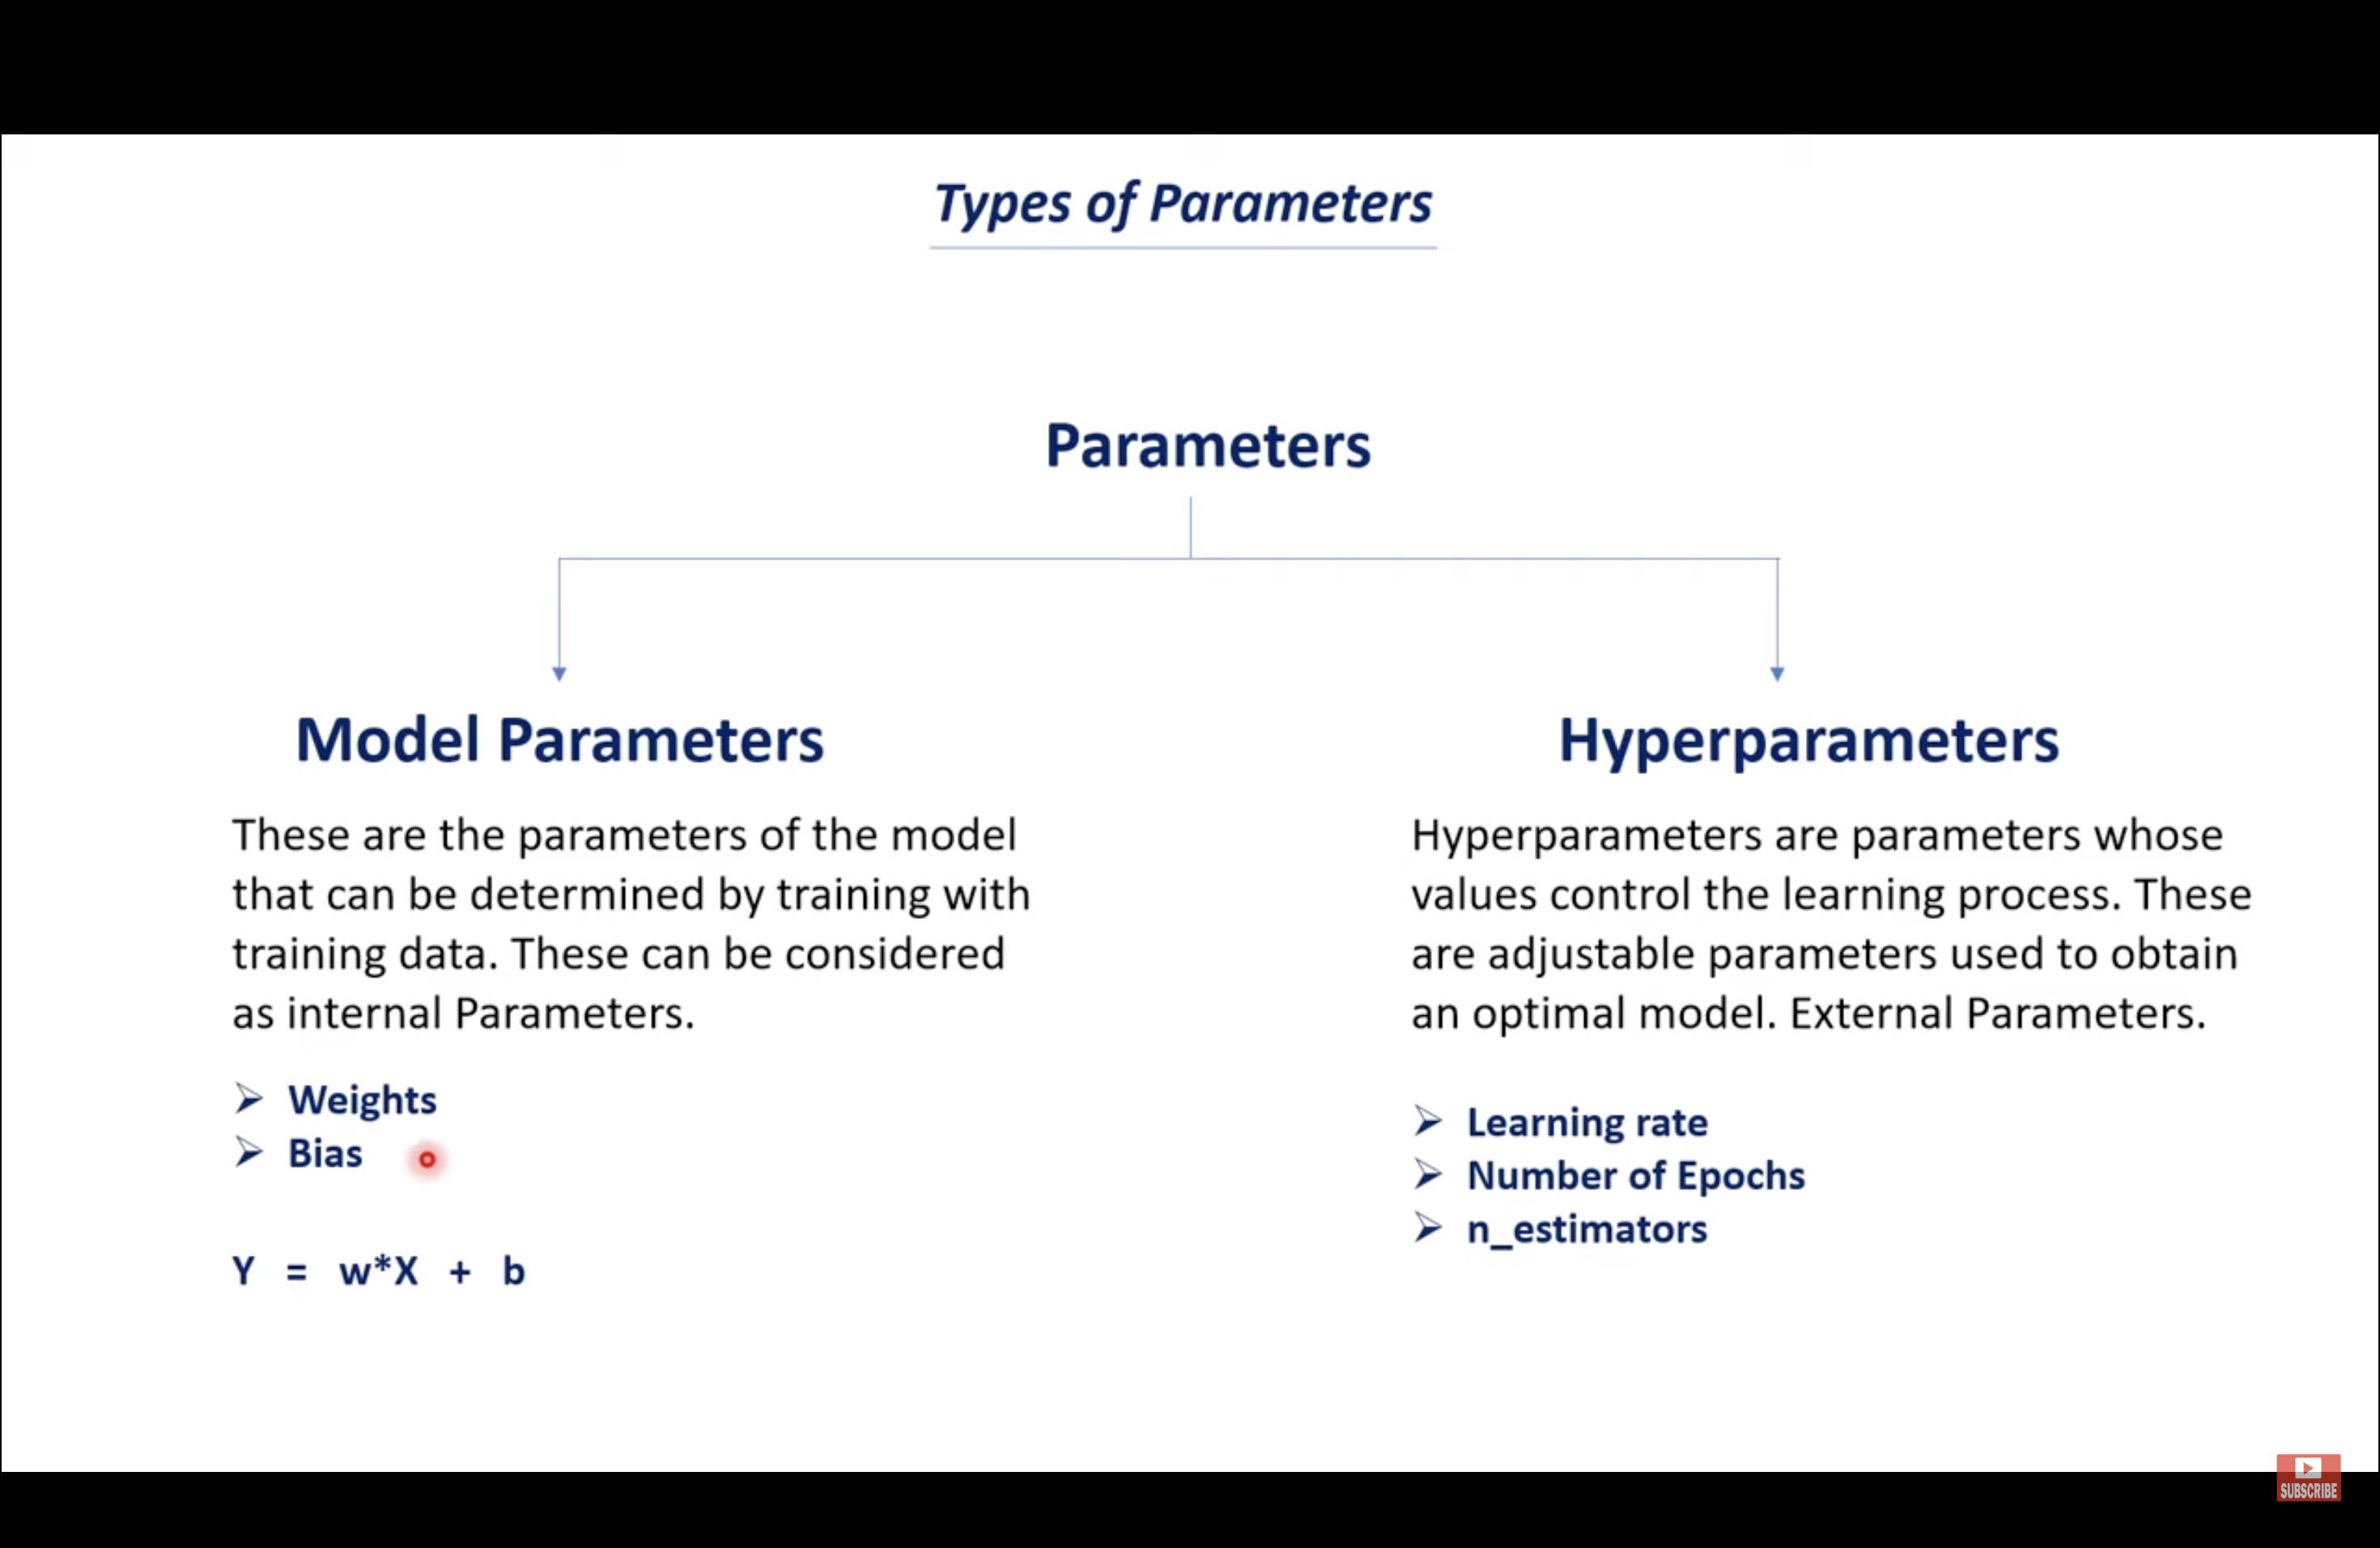

In [3]:
# importing the dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [5]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [6]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [7]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [9]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
# number of rows and Columns in this dataset
data_frame.shape

(569, 31)

In [11]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [12]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64


1 --> Benign0 --> Malignant

1 --> Benign
0 --> Malignant

In [13]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [14]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [15]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [16]:
 X = np.asarray(X)
 Y = np.asarray(Y)



```
# This is formatted as code
```

#**GridSearchCV**

In [17]:
# loading the SVC model
model = SVC()

In [18]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [19]:
# grid search
classifier = GridSearchCV(model, parameters, cv=5)

In [20]:
# fitting the data to our model
classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [21]:
classifier.cv_results_

{'mean_fit_time': array([5.92429638e-01, 1.59964561e-03, 1.96356773e-03, 5.06625175e-03,
        1.21212745e+00, 1.67374611e-03, 1.82027817e-03, 4.85343933e-03,
        1.74953804e+00, 1.84020996e-03, 1.75099373e-03, 4.82778549e-03,
        2.93291397e+00, 1.87416077e-03, 1.73902512e-03, 4.77190018e-03]),
 'std_fit_time': array([2.26693826e-01, 2.84898131e-05, 4.93540050e-05, 1.25236593e-04,
        2.40701574e-01, 1.24770108e-04, 8.27470347e-05, 1.65054301e-04,
        3.74536923e-01, 1.17906085e-04, 5.89921765e-05, 2.09249076e-04,
        9.43542446e-01, 9.89235892e-05, 9.63090662e-05, 3.73027713e-04]),
 'mean_score_time': array([0.00053277, 0.00041628, 0.00077281, 0.00121174, 0.0005188 ,
        0.00040612, 0.00072193, 0.00113897, 0.00046721, 0.00043044,
        0.00064359, 0.00113559, 0.00051103, 0.00037198, 0.00059566,
        0.00116291]),
 'std_score_time': array([1.30440336e-04, 8.13702736e-06, 2.13975063e-05, 2.39705428e-05,
        6.97386367e-05, 5.28106571e-06, 7.76970997e-

In [22]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [23]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [24]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [25]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.592430,0.226694,0.000533,0.000130,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.001600,0.000028,0.000416,0.000008,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.001964,0.000049,0.000773,0.000021,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.005066,0.000125,0.001212,0.000024,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,1.212127,0.240702,0.000519,0.000070,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [26]:
#GridSearchCV is used for determining the best parameters for our model
grid_search_result = result[['param_C','param_kernel','mean_test_score']]

In [27]:
# loading the SVC model
model = SVC()

In [28]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [29]:
# grid search
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [30]:
# fitting the data to our model
classifier.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [31]:
classifier.cv_results_

{'mean_fit_time': array([4.45609093e-03, 6.35976791e-03, 4.90474701e-03, 4.50630188e-03,
        1.53117180e-03, 1.70950890e-03, 2.94076867e+00, 1.80597305e-03,
        4.99048233e-03, 5.88043976e-01]),
 'std_fit_time': array([1.75052656e-03, 2.54763228e-04, 4.00906324e-04, 1.89816014e-04,
        7.10484806e-05, 9.13909635e-05, 9.59595607e-01, 6.94888363e-05,
        1.11351493e-04, 2.31758639e-01]),
 'mean_score_time': array([0.00159402, 0.00155959, 0.0011272 , 0.00105577, 0.00040259,
        0.00060124, 0.00047865, 0.00038157, 0.00121293, 0.0004775 ]),
 'std_score_time': array([4.86558673e-04, 1.39972183e-04, 9.54572017e-05, 1.20323694e-05,
        1.66351257e-05, 2.30378977e-05, 6.97773591e-05, 5.75098034e-06,
        1.70475786e-05, 6.43884499e-05]),
 'param_kernel': masked_array(data=['rbf', 'sigmoid', 'sigmoid', 'sigmoid', 'poly', 'rbf',
                    'linear', 'poly', 'sigmoid', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
       

In [32]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 20}


In [33]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9490607048594939


In [34]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [35]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004456,0.001751,0.001594,0.000487,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,5
1,0.006360,0.000255,0.001560,0.000140,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,8
2,0.004905,0.000401,0.001127,0.000095,sigmoid,20,"{'kernel': 'sigmoid', 'C': 20}",0.473684,0.403509,0.421053,0.342105,0.353982,0.398867,0.047640,10
3,0.004506,0.000190,0.001056,0.000012,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.482456,0.403509,0.421053,0.342105,0.362832,0.402391,0.048906,9
4,0.001531,0.000071,0.000403,0.000017,poly,1,"{'kernel': 'poly', 'C': 1}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,6


In [36]:
randomized_search_result = result[['param_C','param_kernel','mean_test_score']]

In [37]:
randomized_search_result

,param_C,param_kernel,mean_test_score
0,1,rbf,0.912172
1,5,sigmoid,0.411178
2,20,sigmoid,0.398867
3,10,sigmoid,0.402391
4,1,poly,0.908663
5,20,rbf,0.920944
6,20,linear,0.949061
7,10,poly,0.920975
8,1,sigmoid,0.460441
9,1,linear,0.945536


In [38]:
#Random search may skip some part